In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from datasets.MackeyGlassDataset import MackeyGlassDataset
import esn
import utils
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data.dataloader import DataLoader
import numpy as np
# import mdp
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Dataset params
sample_length = 5000
n_samples = 40
batch_size = 5
seed = 543

# Mackey glass dataset
mackey_glass_dataset = MackeyGlassDataset(sample_length, n_samples, tau=30)

# Data loader
dataloader = DataLoader(mackey_glass_dataset, batch_size=5, shuffle=False, num_workers=2)

# ESN properties
input_dim = 200
n_hidden = 100
w_sparsity=0.1

n_iterations = 50

In [19]:
# Model Definition
model = esn.ESN(
    input_dim=input_dim,
    hidden_dim=n_hidden,
    output_dim=1,
    w_sparsity=w_sparsity,
    feedbacks=True
)

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Objective function
criterion = nn.MSELoss()

In [21]:
for i_iter in range(n_iterations):
    # Iterate through batches
    for i_batch, sample_batched in enumerate(dataloader):
        # For each sample
        for i_sample in range(sample_batched.size()[0]):
            optimizer.zero_grad()
            model.reset_hidden()
            # Inputs and outputs
            tmp_in = None
            for i in range(input_dim):
                tmp = sample_batched[i_sample][i:sample_length-input_dim+i]
                if tmp_in is None:
                    tmp_in = tmp
                else:
                    tmp_in = np.concatenate([tmp_in, tmp], axis=-1)
            tmp_out = sample_batched[i_sample][input_dim:]
            tmp_in = torch.tensor(tmp_in).view(1, -1, input_dim)
            tmp_out = torch.tensor(tmp_out)
            inputs = Variable(tmp_in, requires_grad=False)
            outputs = Variable(tmp_out)

            # Null loss
            loss = 0

            outs = model(inputs, outputs.view(1, -1, 1)).view(-1, 1)
            # Add loss
            loss = criterion((F.tanh(outs)), outputs)
            
            # Loss
            loss.backward()
            optimizer.step()

            # Show the graph only for last sample of iteration
            #if i_batch == len(dataloader) - 1 and i_sample == len(sample_batched) -1 :
            """plt.plot(inputs.data.numpy(), c='b')
            plt.plot(outputs.data.numpy(), c='lightblue')
            plt.plot(esn_outputs.numpy(), c='r')
            plt.show()"""
    print(u"Iteration {}, loss {}".format(i_iter, loss.data[0]))

Iteration 0, loss 0.3205712139606476


/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:39: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration 1, loss 0.32704031467437744
Iteration 2, loss 0.3045910894870758
Iteration 3, loss 0.27995091676712036
Iteration 4, loss 0.26133596897125244
Iteration 5, loss 0.24904075264930725
Iteration 6, loss 0.23924832046031952
Iteration 7, loss 0.23205454647541046
Iteration 8, loss 0.23605641722679138
Iteration 9, loss 0.1989031434059143
Iteration 10, loss 0.20097368955612183
Iteration 11, loss 0.1799331158399582
Iteration 12, loss 0.17469188570976257
Iteration 13, loss 0.1849062591791153
Iteration 14, loss 0.16204403340816498
Iteration 15, loss 0.17036201059818268
Iteration 16, loss 0.1549280732870102
Iteration 17, loss 0.16454705595970154
Iteration 18, loss 0.15671482682228088
Iteration 19, loss 0.14130641520023346
Iteration 20, loss 0.14350880682468414
Iteration 21, loss 0.1393633633852005
Iteration 22, loss 0.14534884691238403
Iteration 23, loss 0.1366024762392044
Iteration 24, loss 0.1245599016547203
Iteration 25, loss 0.12907849252223969
Iteration 26, loss 0.12434234470129013


Process Process-276:
Process Process-275:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/torch/utils/da

KeyboardInterrupt: 

input:  torch.Size([1, 4800, 200])
outputs:  torch.Size([4800, 1])


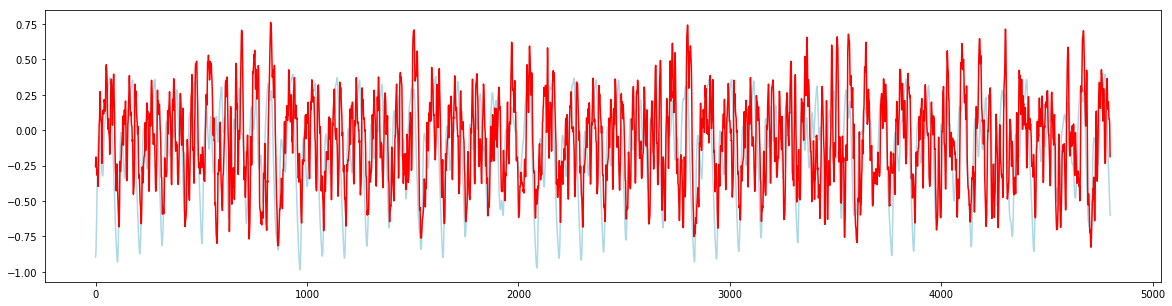

In [24]:
for i_iter in range(n_iterations):
    # Iterate through batches
    for i_batch, sample_batched in enumerate(dataloader):
        # For each sample
        for i_sample in range(sample_batched.size()[0]):
            # Inputs and outputs
            tmp_in = None
            for i in range(input_dim):
                tmp = sample_batched[i_sample][i:sample_length-input_dim+i]
                if tmp_in is None:
                    tmp_in = tmp
                else:
                    tmp_in = np.concatenate([tmp_in, tmp], axis=-1)
            tmp_out = sample_batched[i_sample][input_dim:]
            tmp_in = torch.tensor(tmp_in).view(1, -1, input_dim)
            tmp_out = torch.tensor(tmp_out)
            inputs = Variable(tmp_in, requires_grad=False)
            outputs = Variable(tmp_out)

            # Null loss
            loss = 0
            print("input: ", inputs.size())
            print("outputs: ", outputs.size())
            out = model(inputs).view(-1, 1)
            out = F.tanh(out)
            plt.figure(figsize=(20, 5))
#             plt.plot(inputs.data.numpy(), c='b')
            plt.plot(outputs.data.numpy(), c='lightblue')
            plt.plot(out.data.numpy(), c='r')
            plt.show()
            break
        break
    break
    print(u"Iteration {}, loss {}".format(i_iter, loss.data[0]))

Creating offscreen glfw
action: [-0.24021219  0.12090117  0.33643645 -0.42656663 -0.96107507 -0.20155524
 -0.38294408  0.88436943]
reward: -0.09286130019042571
action: [ 0.7765301   0.72062135  0.30599952 -0.31142166  0.09769853  0.63045007
 -0.80277926  0.6021498 ]
reward: -0.23687352224382563
action: [-0.9176404   0.63284206  0.6151276  -0.8979854   0.25432143  0.00490615
 -0.660361   -0.7032421 ]
reward: -0.38507753013199464
action: [ 0.54651827  0.1353855   0.9659983   0.96449554  0.985334   -0.762769
  0.8765123  -0.5108608 ]
reward: -1.1817710037553102
action: [-0.08357548  0.5148131  -0.5927581   0.13262321 -0.62836653 -0.79052776
 -0.7668828  -0.28472194]
reward: 0.07458521230776605
action: [-0.99069035 -0.15029216  0.3283942  -0.19662362 -0.8284108  -0.8746223
 -0.44376698 -0.6613746 ]
reward: -0.09217871038165582
action: [ 0.93018997 -0.69753957  0.6109249   0.17221588  0.13857384  0.02416143
  0.94352615 -0.27231044]
reward: 0.14904353946811788
action: [ 0.5758315   0.110588

<IPython.core.display.Javascript object>


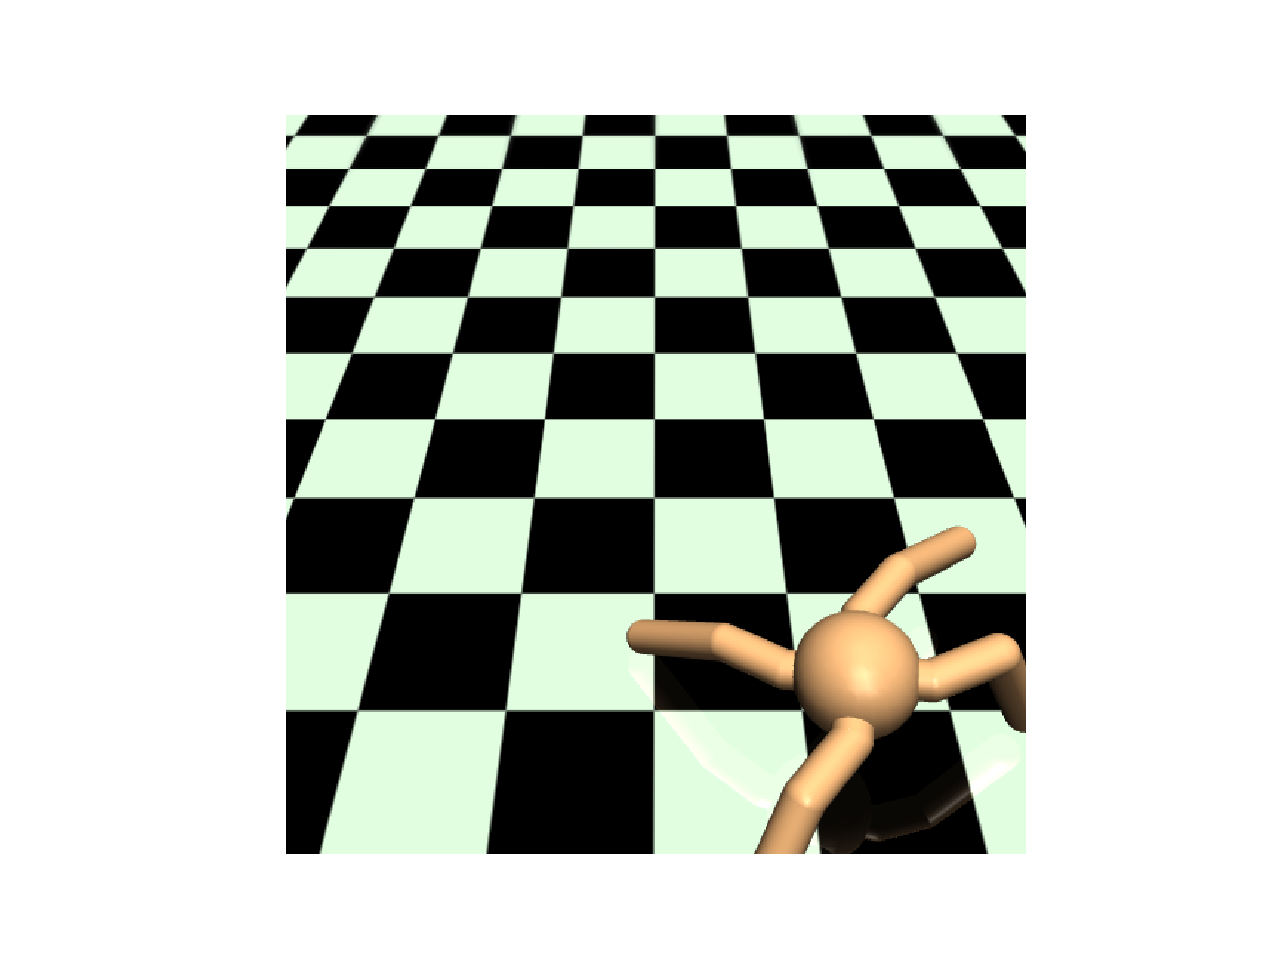

In [5]:
import gym
from gym import wrappers
from matplotlib import animation
from matplotlib import pyplot as plt
%matplotlib nbagg
env = gym.make('Ant-v2')
env.reset()

frames = []
for t in range(5000):
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print("action:", action)
    print("reward:", reward)
    if done:
        break
# env.render()

fig = plt.gcf()
patch = plt.imshow(frames[0])
plt.axis('off')

def animate(i):
    patch.set_data(frames[i])

anim = animation.FuncAnimation(fig, animate, frames = len(frames), interval=50)
anim

In [29]:
tmp_in = None
tmp_out = sample_batched[i_sample][20:]
for i in range(20):
    tmp = sample_batched[i_sample][i:1000-20+i]
    print(tmp.shape)
    if tmp_in is None:
        tmp_in = tmp
    else:
        tmp_in = np.concatenate([tmp_in, tmp], axis=-1)

torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])
torch.Size([980, 1])


In [30]:
print(tmp_in.shape)
print(tmp_out.shape)

(980, 20)
torch.Size([980, 1])


In [31]:
tmp_out

tensor([[-0.6089],
        [-0.6220],
        [-0.6386],
        [-0.6417],
        [-0.6612],
        [-0.6708],
        [-0.6770],
        [-0.6801],
        [-0.6776],
        [-0.6778],
        [-0.6780],
        [-0.6468],
        [-0.5827],
        [-0.4960],
        [-0.4038],
        [-0.3169],
        [-0.2395],
        [-0.1731],
        [-0.1185],
        [-0.0745],
        [-0.0397],
        [-0.0129],
        [ 0.0073],
        [ 0.0213],
        [ 0.0296],
        [ 0.0325],
        [ 0.0310],
        [ 0.0277],
        [ 0.0216],
        [ 0.0138],
        [ 0.0048],
        [-0.0056],
        [-0.0170],
        [-0.0286],
        [-0.0407],
        [-0.0534],
        [-0.0662],
        [-0.0781],
        [-0.0889],
        [-0.0987],
        [-0.1081],
        [-0.1146],
        [-0.1143],
        [-0.1030],
        [-0.0792],
        [-0.0443],
        [-0.0024],
        [ 0.0400],
        [ 0.0758],
        [ 0.0999],
        [ 0.1110],
        [ 0.1104],
        [ 0.

In [32]:
tmp_in

array([[ 0.12778692,  0.05643566, -0.01719597, ..., -0.56179196,
        -0.5772605 , -0.59461534],
       [ 0.05643566, -0.01719597, -0.07787044, ..., -0.5772605 ,
        -0.59461534, -0.60892427],
       [-0.01719597, -0.07787044, -0.13012107, ..., -0.59461534,
        -0.60892427, -0.6220429 ],
       ...,
       [-0.08049497, -0.0619652 , -0.04223758, ...,  0.10902645,
         0.08548512,  0.06390763],
       [-0.0619652 , -0.04223758, -0.01743833, ...,  0.08548512,
         0.06390763,  0.04688009],
       [-0.04223758, -0.01743833,  0.01381688, ...,  0.06390763,
         0.04688009,  0.03711735]], dtype=float32)